In [20]:
pip install pandas numpy scikit-learn matplotlib 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cargar los datos
data = pd.read_csv("winequality-red.csv")

# Ver las primeras filas del dataframe
print(data.head(20))


    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36    

In [27]:
# Comprobar si hay valores nulos
print(data.isnull().sum())

# Si hay valores nulos, se pueden eliminar o imputar
# data.fillna(data.mean(), inplace=True)  # Ejemplo de imputación

# Separar variables independientes y la variable objetivo
X = data.iloc[:, :11]  # Variables de entrada
y = data['quality']     # Variable objetivo


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [28]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Crear el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [38]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.61
R² Score: 0.07


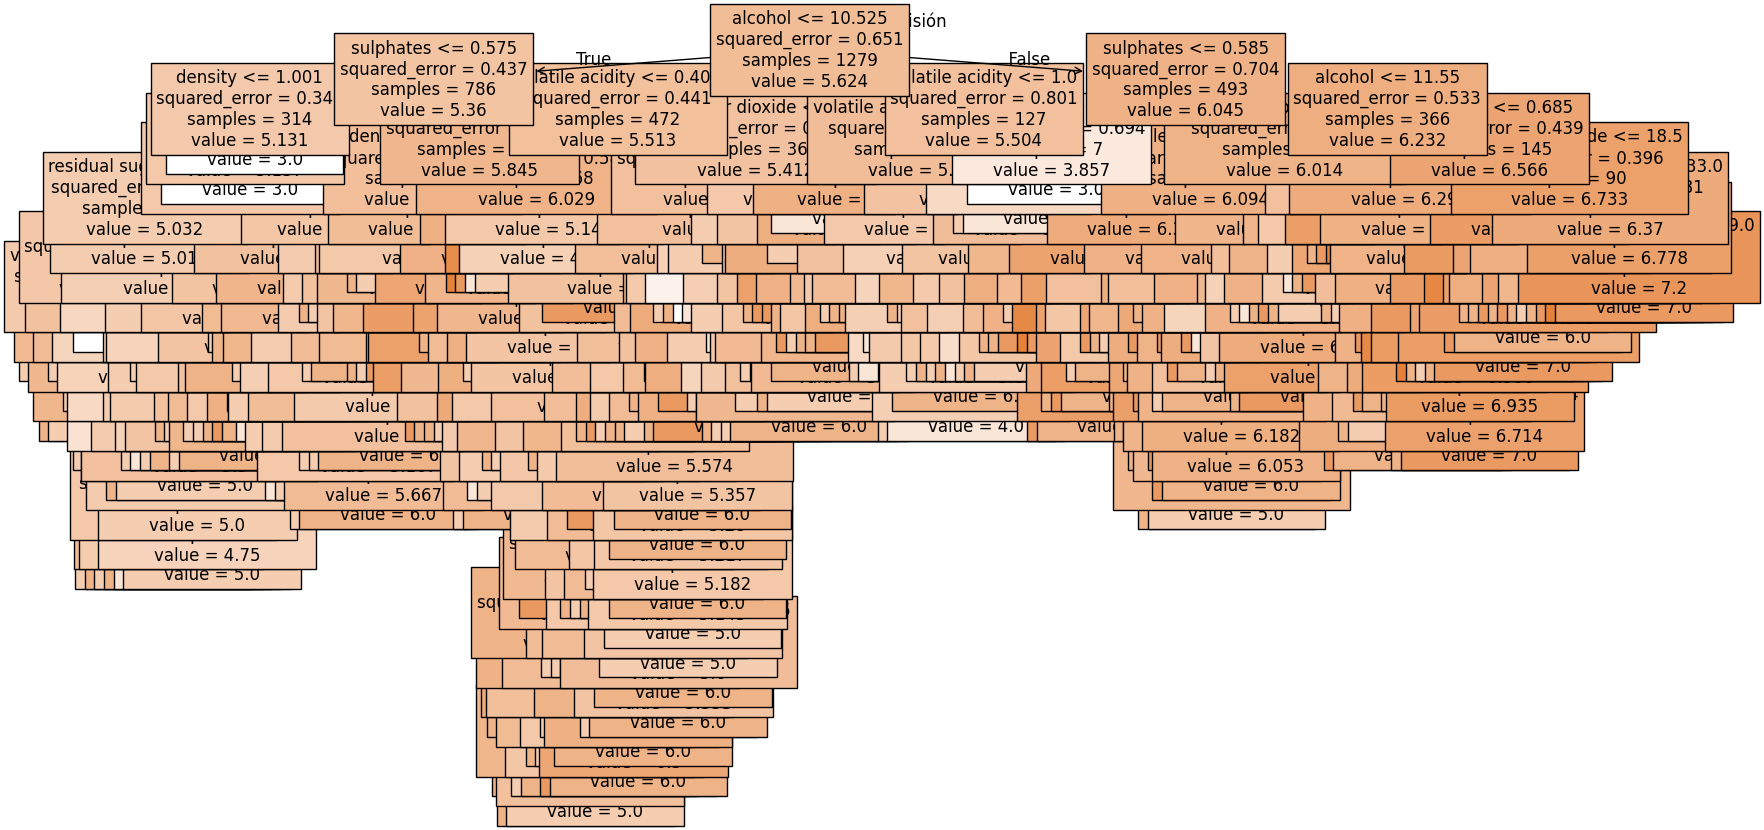

In [39]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()
